<a href="https://colab.research.google.com/github/kaustubhadixit/Credit-Card-Fraud/blob/main/CC_Fraud_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fraud Detection in Credit Card Transactions**

## **Introduction**
This project is about analysis of credit card fradulent transactions data and building machine learning models to identify fraudulent card transactions

### **Import Libraries**

In [ ]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Information about dataset**
The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

### **Mount google drive and load data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/creditcard.csv") 

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
df[['Time', 'Amount']].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


### **Scatter Plots, Histograms**

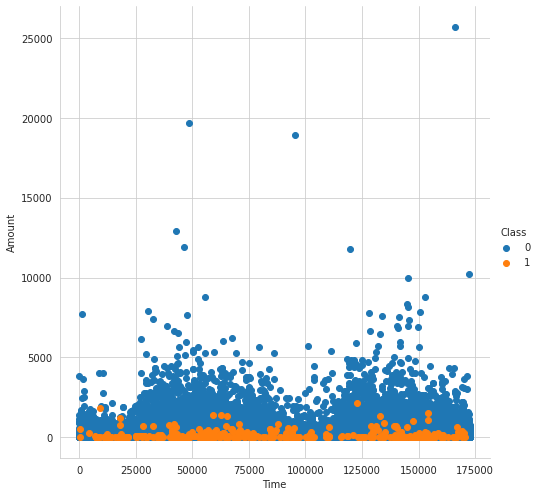

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue = "Class", height = 7).map(plt.scatter, "Time","Amount").add_legend()
plt.show()

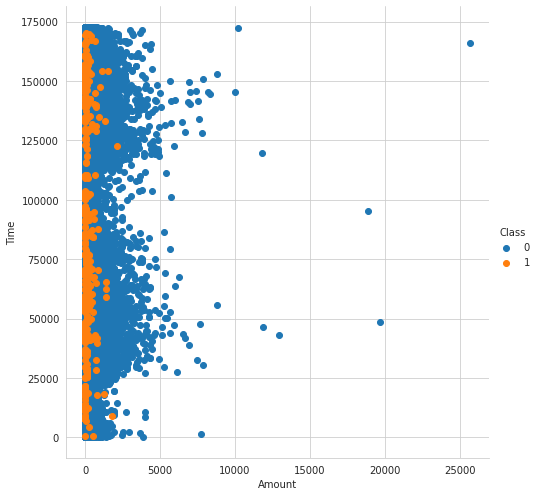

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="Class", height = 7).map(plt.scatter, "Amount", "Time").add_legend()
plt.show()

**Observations**


*   Looking at the above two scatter plots, it is clearly visible that fraudulent cases are the ones with amount less than around 2500.
*   Frauds are evenly distributed with time



In [ ]:
df_filter = df[['Time','Amount', 'Class']]
df_filter.head()

,Time,Amount,Class
0,0.0,149.62,0
1,0.0,2.69,0
2,1.0,378.66,0
3,1.0,123.50,0
4,2.0,69.99,0


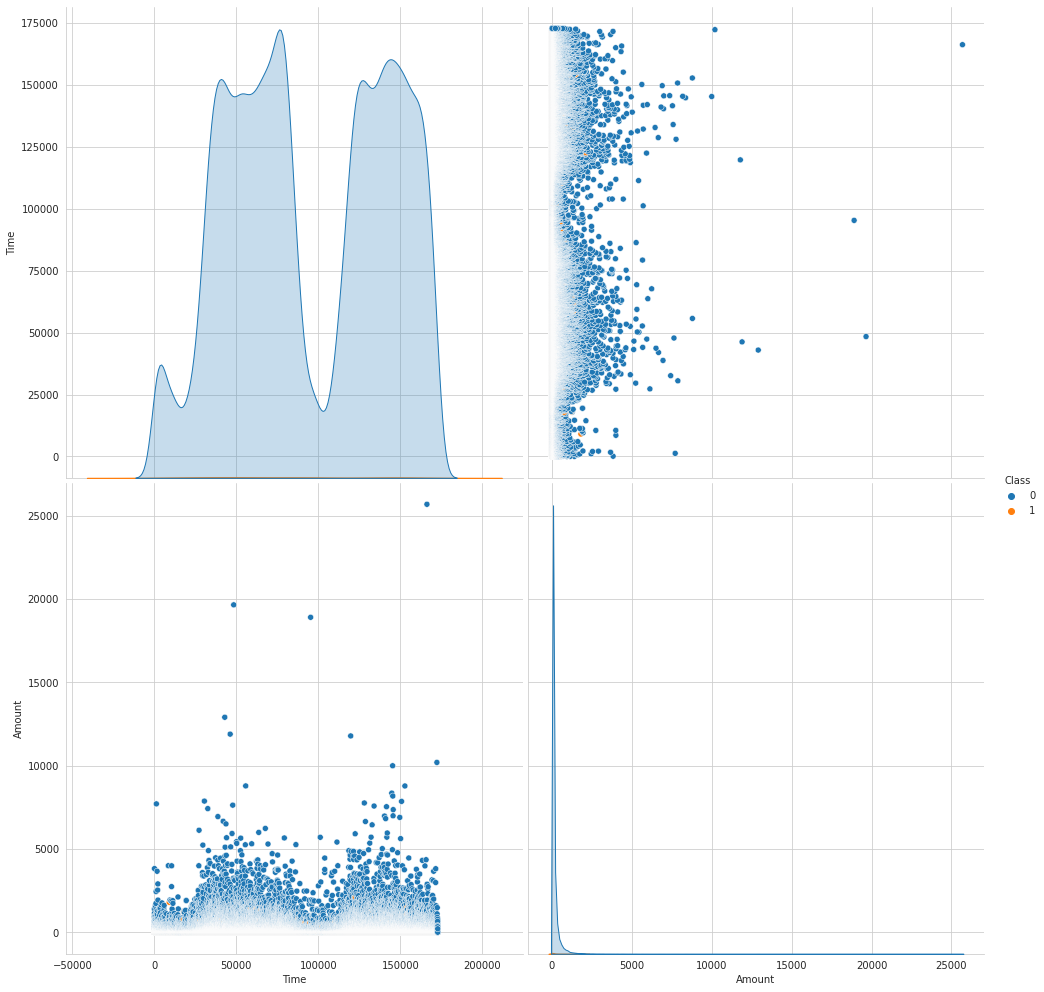

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(df_filter, hue="Class", height=7)
plt.show()

In [ ]:
print('Normal transactions count: ', df['Class'].value_counts().values[0])
print('Fraudulent transactions count: ', df['Class'].value_counts().values[1])

Normal transactions count:  284315
Fraudulent transactions count:  492


In [ ]:
cless = 0
cmore = 0
for i in range(284806):
  if(df_filter.iloc[i]["Amount"]<2400):
    cless += 1
  else:
    cmore += 1
print(cless, cmore)

284319 487


In [ ]:
p = (cless/284806)*100
p

99.82900641138178

**Observation**
Fraudulent transaction count is 492 and its been calculated that the number of fraudulent cases with amount less than 2400 is 487, thats pretty close.

We can say that most of the fruaudulent cases are of amount less than 2400 and 99.83% of transactions have amount less than 2400

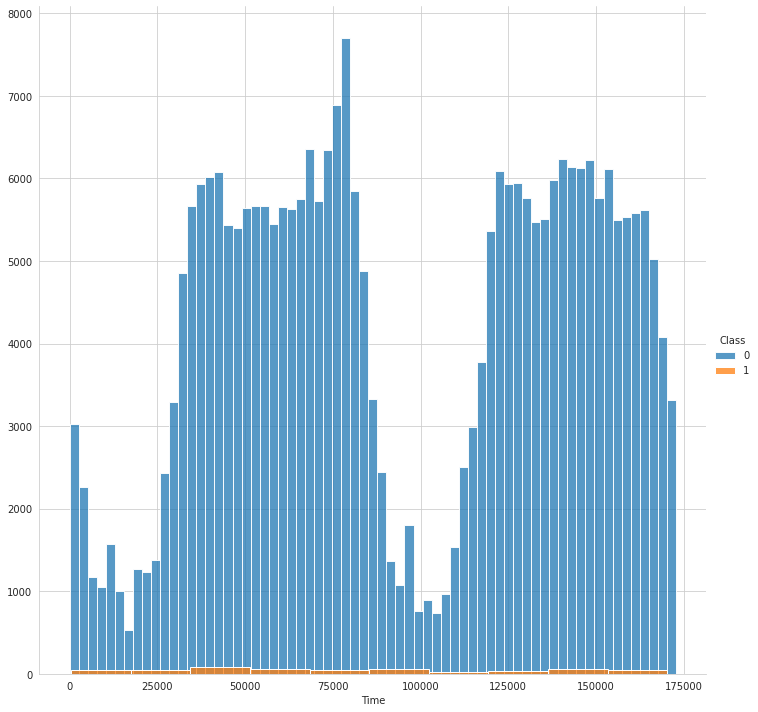

In [ ]:
df_genuine = df_filter.loc[df_filter["Class"]==0]
df_fraud = df_filter.loc[df_filter["Class"]==1]

sns.FacetGrid(df_filter, hue="Class", height=10).map(sns.histplot, "Time").add_legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


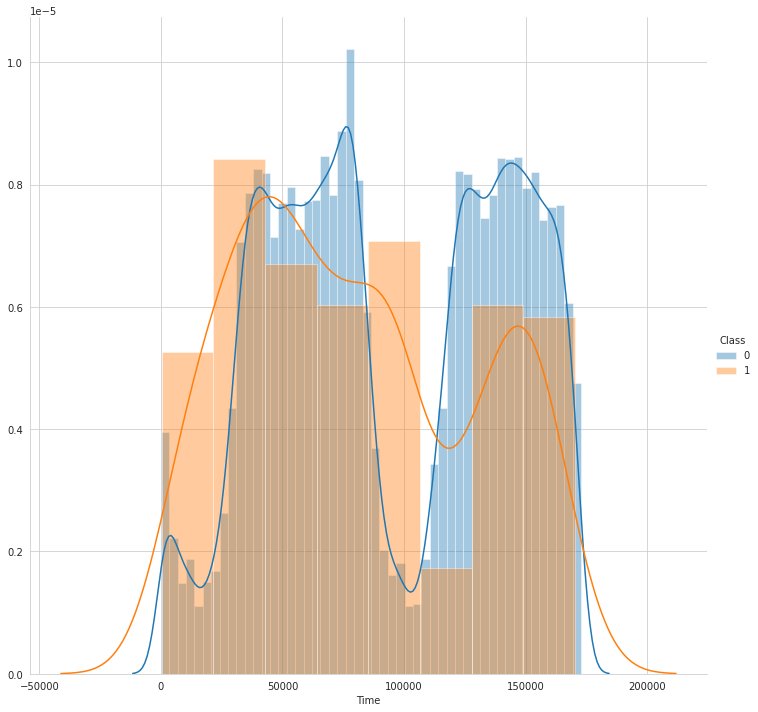

In [ ]:
sns.FacetGrid(df_filter, hue="Class", height=10).map(sns.distplot, "Time").add_legend()
plt.show()

**Observation**
There is a heavy overlap of genuine and fraud transactions throughout the time and there is no clear distinction.

**Box Plots**

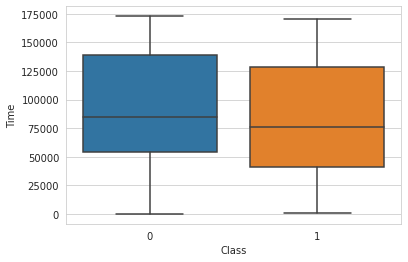

In [ ]:
sns.boxplot(x = "Class", y = "Time", data=df)
plt.show()

This confirms that both fraud and geniune transactions occured throughout time and there is no distinction between them which means this was not delibrate or a record error

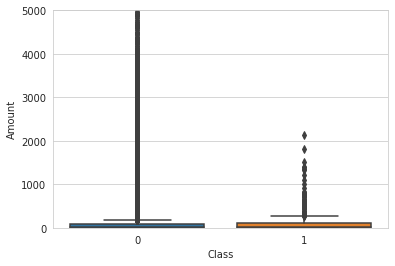

In [ ]:
sns.boxplot(x = "Class", y = "Amount", data = df)
plt.ylim(0, 5000)
plt.show()

From above box plot we can easily infer that there are no fraud transactions occur above the transaction amount of 3000. All of the fraud transactions have transaction amount less than 3000. However, there are many transactions which have a transaction amount greater than 3000 and all of them are genuine.

### **Correlation**
Correlation of Class with every other

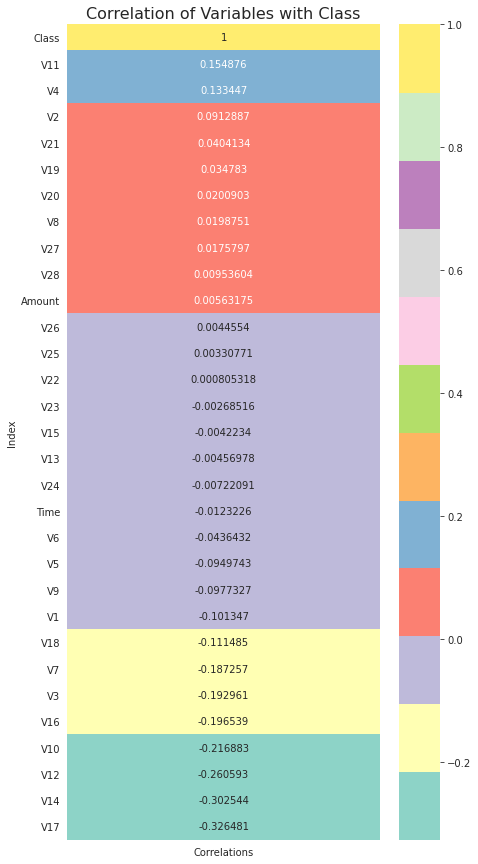

In [ ]:
corr = df.corrwith(df['Class']).reset_index()

corr.columns = ['Index','Correlations']
corr = corr.set_index('Index')
corr = corr.sort_values(by=['Correlations'], ascending = False)

plt.figure(figsize=(7,15))
fig = sns.heatmap(corr, annot=True, fmt="g", cmap='Set3', linecolor='black')

plt.title("Correlation of Variables with Class", fontsize=16)
plt.show()

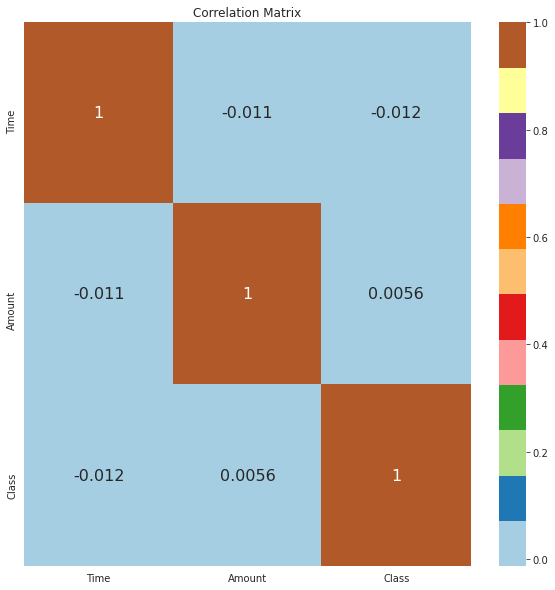

In [ ]:
# Heatmap for explainatory variables
plt.subplots(figsize=(10,10))
plt.title("Correlation Matrix", fontsize=12)
sns.heatmap(df_filter.corr(), cmap="Paired",annot=True, annot_kws={'size':16})

**Observations**
*   V10, V12, V14 and V17 are negatively correlated. Notice how the lower these values are, the more likely the end result will be a fraud transaction.
*   V2, V4, V11, and V19 are positively correlated. Notice how the higher these values are, the more likely the end result will be a fraud transaction.
*   Bad thing is since V's are not descriptive so its not possible to explain the exact correlation

**Next we will process the data to make it better to fit into models.**